In [2]:
from disentangle.data_loader.raw_mrc_dloader import get_mrc_data
import os
ch1path = '/group/jug/ashesh/data/BioSR/F-actin/GT_all_a.mrc'
ch2path = '/group/jug/ashesh/data/BioSR/CCPs/GT_all.mrc'
ch3path ='/group/jug/ashesh/data/BioSR/ER/GT_all.mrc'
ch4path = '/group/jug/ashesh/data/BioSR/F-actin_Nonlinear/GT_all_a.mrc'
ch5path = '/group/jug/ashesh/data/BioSR/Microtubules/GT_all.mrc'

In [3]:
data1 = get_mrc_data(ch1path)
data2 = get_mrc_data(ch2path)
data3 = get_mrc_data(ch3path)
data4 = get_mrc_data(ch4path)
data5 = get_mrc_data(ch5path)

In [4]:
kernel_size = 200
scale_factor = 3
sigma = 1
qt_background = 0.5

img = data3[0]

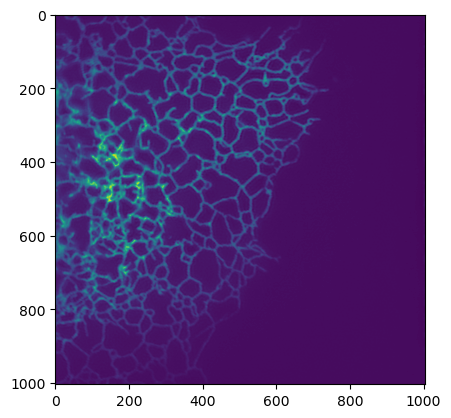

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img)

In [23]:
img = img[:128, :128]

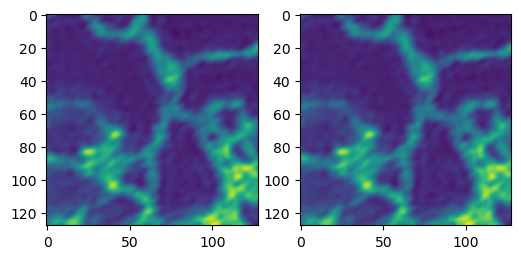

In [93]:
from disentangle.data_loader.variable_intensity_augmentation import get_weight_mask
diff_dict = {}
for sigma  in np.arange(0.3,0.7, 0.1):
    diff_dict[sigma] = []

    patch_size = img.shape[-1]
    f_size = int(patch_size * 5)
    for _ in range(100):
        factor = get_weight_mask((f_size, f_size), np.ones((f_size, f_size)), kernel_size = f_size -1, scale_factor = scale_factor, sigma = sigma, bright_spot_count= 1)
        h = np.random.randint(0, f_size - patch_size)
        w = np.random.randint(0, f_size - patch_size)
        factor = factor[h:h + patch_size, w:w + patch_size]
        new_img = factor*img
        diff_dict[sigma].append(np.mean(np.abs(new_img - img)))   


_,ax = plt.subplots(figsize= (6,3),ncols=2)
ax[0].imshow(new_img)
ax[1].imshow(img)

In [94]:
for key in diff_dict.keys():
    val = np.array(diff_dict[key])
    print(np.round(key,2), (val > 0).mean())


0.3 0.19
0.4 0.3
0.5 0.49
0.6 0.65


In [99]:
np.max(diff_dict[0.6])

KeyError: 0.6